
# Project: the Movie DB Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this analyses we are going to be using TMDb movies data downloaded from this source: <a href="https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1520522518919000&usg=AFQjCNFq5i_6NPzZG9mVu4eKKxPmiBHDGg">tMDB Dataset</a>

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column, we are not cleaning up this column during this analysis.

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 

As a result of this analysis we are looking to answer the following questions:

- #### Which genres are most popular from year to year?
- #### Which are the top 3 most popular genres overall?
- #### For the most popular genre in the first year of information how was the evolution of its popularity?
- #### For the most popular genre in the last year of information, how was the evolution of its popularity?
- #### How is the distribution of movies making revenue vs loosing money?
- #### What kinds of properties are associated with movies that have high revenues?


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:

#DataFrame is loaded from the file
df = pd.read_csv('tmdb-movies.csv')

#Prints the first lines of the dataset to analyse the content
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Getting more info about the Dataset - Number of Rows and Columns
df.shape

(10866, 21)

In [5]:
# Getting more info about the Dataset - Type and none-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Data Cleaning

### Removing unnecessary columns

For cleaning up the data, we are going to drop columns we will not be using. In this case we will keep the original_title in case we need to reference the movie for checking if some data is correct later


In [6]:
df.drop(['imdb_id','homepage','tagline','keywords','overview'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


### Replacing the budget and revenue columns by the adjusted values 

In regards to the budget and the revenue columns we are going to use the _adj columns to make sure we are comparing values that represent the same amount. 
We will be dropping the budget and revenue columns and rename the _adj columns for facilitating analysis

In [8]:
df.drop(['budget','revenue'], axis=1, inplace=True)

In [9]:
df.rename(index=str, columns={"budget_adj": "budget", "revenue_adj": "revenue"}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget                  10866 non-null float64
revenue                 10866 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


### Cleaning up Dataframe from null values

We can now check and start analysing null values 

In [11]:
df.columns[df.isna().any()].tolist()

['cast', 'director', 'genres', 'production_companies']

From the columns that we have left it looks like we are only missing data related to:

- cast
- director
- genres
- production_companies

From the nature of this data we will not drop the rows or fill the data from this dataframe. Rows will be dropped when analysing each variable in particular. <br>
For example when analysing which genres were the most popular we will drop the rows with no genre, but will keep the ones with no director. 
In the same way when analysing if a specific director is correlated to the revenue value we will drop the rows with no Director but will keep the ones with no genre. 

### Checking for Duplicates

In [12]:
# Check if we have any duplicated Row
df.duplicated().sum()

1

In [13]:
# Eliminates Duplicated columns from the dataframe
df.drop_duplicates(inplace=True)

In [14]:
# Validates that we don't have more duplicated rows
df.duplicated().sum()

0

### Analysing the Dataframe for inconsitencies or errors in the information

After the initial clean up we can continue to analyse the data, we will be reviewing some general values about the different variables

In [15]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can learn something from this result:
- <b>id:</b> We need to convert this to string so it doesn't show up in this analysis 
- <b>popularity:</b> It looks like very few movies have high popularity values in tMDB database, we will view this more easily with an histogram later. 
- <b>runtime:</b> the mean is 102 minutes, which makes sense. But max and min values look weird. Min=0, Max=900. We might want to check those rows to see if there is anything wrong. 
- <b>release_year:</b> we can see the first movie in the database was released in 1960 and the last one in 2015
- <b>budget:</b> very few movies have a high budget, we can see this more clear with an histogram later. It also looks like the min is 0, we might want to check that.
- <b>revenue:</b> very few movies are doing a high revenue, we can see this more clear with a histogram later. It also looks like the min is 0, we might want to check that.

### Fixing and analysing edge cases in Data

#### Id column
We can start reviewing the points of information that called our attention, but first lets fix the type of the id column. 

In [16]:
df['id'] = df['id'].astype(str)

In [16]:
type(df.id[0])

str

#### Runtime edge-cases
Now lets review those movies where the runtime was 0 and 900 minutes to see if there is something wrong about them

In [17]:
len(df[df['runtime'] == 0])

31

In [18]:
df[df['runtime'] == 0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
92,370687,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,0.357654,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,0.097514,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,0.218528,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,0.176744,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,0.028725,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,0.026797,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,0.135376,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,0.037459,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,0.036904,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


We have 31 movies with a value of 0 in runtime. Doing a quick check in google by the movie name we can verify this is incorrect information. We can drop these rows, or assign the mean. In this case we will assign the mean. We can review later if the runtime is a property significant for our analysis

In [17]:
df['runtime'] = df['runtime'].apply(lambda x: df['runtime'].mean() if x==0 else x)

In [18]:
len(df[df['runtime'] == 0])

0

Now lets review the movies with a very high runtime, in this case lets select movies with a runtime higher than 6 hours

In [21]:
len(df[df['runtime'] > 360])

17

In [22]:
df[df['runtime'] > 360]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
1865,220903,0.102223,Life,David Attenborough|Oprah Winfrey,Martha Holmes|Simon Blakeney|Stephen Lyle,500.0,Documentary,British Broadcasting Corporation (BBC),12/14/09,24,7.0,2009,0.000000e+00,0.000000e+00
2170,367186,0.082894,The Pillars of the Earth,Ian McShane|Matthew Macfadyen|Eddie Redmayne|H...,Sergio Mimica-Gezzan,421.0,Drama|History|Romance,Scott Free Productions|Tandem Communications|T...,7/23/10,22,7.3,2010,0.000000e+00,0.000000e+00
2214,189197,0.757082,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540.0,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,5/16/10,183,7.8,2010,1.200000e+08,0.000000e+00
2722,331214,0.537593,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,705.0,Action|Drama|War,HBO,9/9/01,313,8.0,2001,0.000000e+00,1.539360e+08
2843,200813,0.114027,The Blue Planet,David Attenborough,Alastair Fothergill,400.0,Documentary,BBC Films,9/12/01,22,6.9,2001,0.000000e+00,0.000000e+00
3141,54102,0.336308,Generation Kill,Alexander SkarsgÃ¥rd|James Ransone|Lee Tergese...,Susanna White|Simon Cellan Jones,470.0,Drama|War|History,Company Pictures,7/13/08,28,6.6,2008,0.000000e+00,0.000000e+00
3356,118309,0.136540,John Adams,Paul Giamatti|Laura Linney|Stephen Dillane|Tom...,Tom Hooper,501.0,History|Drama,NaN,3/16/08,33,6.6,2008,0.000000e+00,0.000000e+00
3894,125336,0.006925,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900.0,Documentary,NaN,9/3/11,14,9.2,2011,0.000000e+00,0.000000e+00
4041,150004,0.469332,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877.0,Science Fiction,DreamWorks,12/2/02,38,6.8,2002,0.000000e+00,0.000000e+00
4198,13519,1.180484,The Stand,Gary Sinise|Molly Ringwald|Jamey Sheridan|Ruby...,Mick Garris,366.0,Adventure|Drama|Fantasy|Horror,Laurel Entertainment|Greengrass Productions,1/1/94,63,6.7,1994,4.119112e+07,0.000000e+00


Doing some quick search on the Movie title appearing in this list, it looks like this corresponds to "Series" instead of individual movies. Since we don't have any field we can use for filtering Series we will keep these entries around and will be considered as any other movie.

#### Budget edge cases

Lets now review the budget and revenue fields. Since we can see that many many values are close to 0

In [23]:
len(df[df['budget']==0])

5696

In [24]:
len(df[df['revenue']==0.0])

6016

We can see we have several movies missing the budget and revenue information. We should be removing this movies when doing further analysis about these variables. Since the first analysis we will be doing is related to the most popular genres by year we will keep this rows for now in our dataframe

#### Converting release date into a datetime object
Now lets convert the release_date from a string to a datetime object in case we need it in the future and have a cleaner dataset

In [19]:
# Converting relase_date to datetime object
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [20]:
df['release_date'].describe()

count                   10865
unique                   5909
top       2009-01-01 00:00:00
freq                       28
first     1968-01-01 00:00:00
last      2067-12-27 00:00:00
Name: release_date, dtype: object

Viewing the data for release_date it looks like the first movie was released in 1968 and the last movie in 2067. This looks wrong, since the year had only 2 digits the function converted movies released in 1967 to 2067. Lets fix that. 

In [21]:
def truncate_year(date):
    '''
    This function will truncate a datetime object. 
    If the year passed is greater than 2018 it will 
    substract 100 years from the datetime object
    
    Params:
    Input:
        (datetime) date to process
    Returns:
        (datetime) truncated date
    '''
    if date.year > 2018:
        date = date.replace(year=date.year-100)  
        return date
    else:
        return date

In [22]:
# Applies the truncate_year function to each value in the release_date column
df['release_date'] = df['release_date'].apply(truncate_year)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [29]:
df['release_date'].describe()

count                   10865
unique                   5909
top       2009-01-01 00:00:00
freq                       28
first     1960-01-01 00:00:00
last      2015-12-31 00:00:00
Name: release_date, dtype: object

Now the data looks correct. First movie was released in 1960 and last movie was released in 2015. 
We can run one more validation, lets verify the year from the release_date matches the year in release_year

In [23]:
(df['release_date'].map(lambda x: x.year) != df['release_year']).sum()

0

This is good. For each movie the year in release_date is the same year in release_year. We can safely continue with our data analysis

### DataFrame Histogram

Now that we have analised our data a little bit more lets see how it looks with histograms

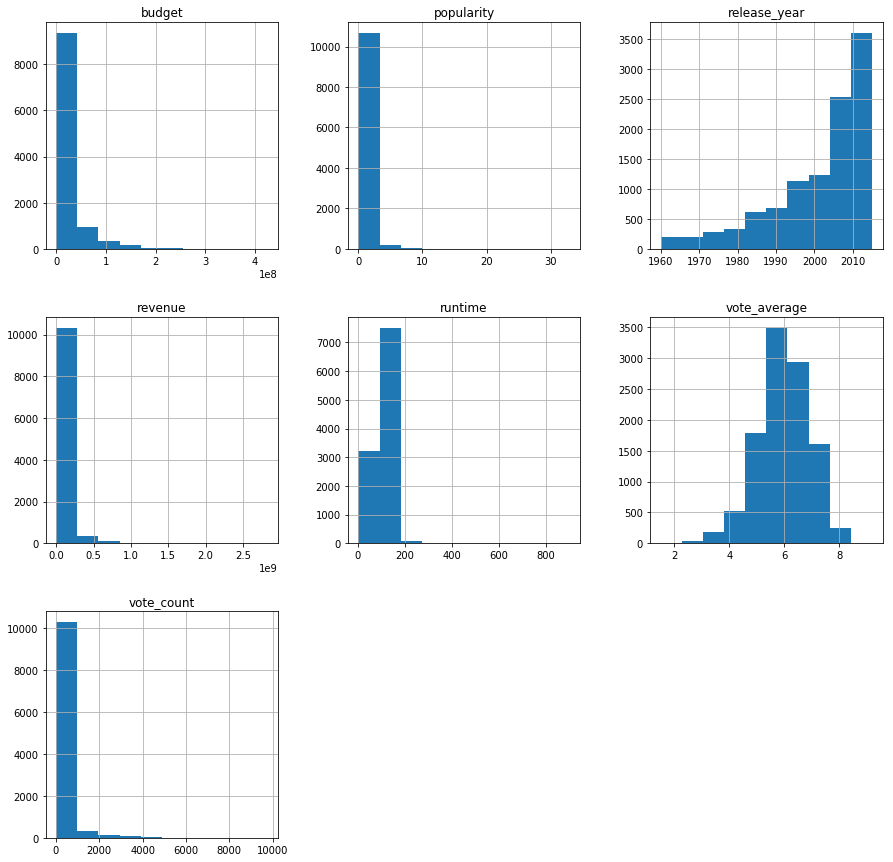

In [24]:
df.hist(figsize=(15,15));

### Analysing the histogram

Viewing the histogram results we can get the following information to continue with our analysis:

1 - Most movies in the database have a very low budget, the graph is heavly skewed to the right<br>
2 - Most movies have very low popularity in tmdb database, the graph is heavly skewed to the right<br>
3 - Most movies in the database have very low revenue, the graph is heavly skewed to the right<br>
4 - More movies are released year by year - graph in this case is skewed to the left<br>
5 - Most movies have a duration of 90-111 mins which sound accurate
<br>

<a id='eda'></a>
## Exploratory Data Analysis


### Which genres are most popular from year to year?

First we are going to do some analysis on the 'genres' field for the dataframe


In [32]:
df["genres"].describe()

count     10842
unique     2039
top       Drama
freq        712
Name: genres, dtype: object

It looks like we have 2039 unique genres and the top one is Drama. 
It also looks like we have 10842 rows with none null genres from 10865 total rows. We will be removing the null values latre during our analysis 

2039 different genres look too much, so lets analyse how the unique values for the genre column look like

In [33]:
df["genres"].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [34]:
df.groupby('genres').count().head()

,id,popularity,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
genres,,,,,,,,,,,,,
Action,63,63,63,63,63,63,57,63,63,63,63,63,63
Action|Adventure,15,15,15,15,15,15,14,15,15,15,15,15,15
Action|Adventure|Animation,4,4,4,4,4,4,4,4,4,4,4,4,4
Action|Adventure|Animation|Comedy|Drama,1,1,1,1,1,1,1,1,1,1,1,1,1
Action|Adventure|Animation|Comedy|Family,1,1,1,1,1,1,1,1,1,1,1,1,1


So we can see that for many movies the genre column has a combination of genres split by the character '|'. If we are going to analyze the most popular genres year by year we need a way to calculate the popularity by each genre handling these combinations. 
In order to do this we are going to explode the dataframe in a way that we will duplicate each row with a unique genre value

We are going to define a helper function that will help us to split the genre values into individual rows

In [25]:
def split_by_value(df, column, sep='|'):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()

    # Drops all null values for the columns that we are filtering
    df = df.dropna(subset=[column])
    
    for i, presplit in enumerate(df[column].astype(str)):
        # For each row we get a list of the different genre
        values = presplit.split(sep)
        # Then we process each genre
        for value in values:
            # Appends the Index of the original row
            indexes.append(i)
            # Appends the value with the genre
            new_values.append(value)
            
    # Created a new dataframe copying the rows from the indexes list 
    new_df = df.iloc[indexes, :].copy()
    
    # Assigns the genre values - Since the indexes match this operation can be 
    # done automatically
    new_df[column] = new_values
    
    # Returns the new dataset
    return new_df

In [27]:
# Creates a new Dataframe that will have one row for each genre and all the rest of the values will be duplicated
df_by_genre = split_by_value(df, 'genres', sep='|')

After the function is applied to process the dataframe lets verify the Genres values are now usefull for our analysis

In [28]:
df_by_genre["genres"].describe()

count     26955
unique       20
top       Drama
freq       4760
Name: genres, dtype: object

In [29]:
df_by_genre['genres'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [30]:
df_by_genre.groupby('genres').count()

,id,popularity,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
genres,,,,,,,,,,,,,
Action,2384,2384,2384,2381,2378,2384,2239,2384,2384,2384,2384,2384,2384
Adventure,1471,1471,1471,1469,1466,1471,1390,1471,1471,1471,1471,1471,1471
Animation,699,699,699,669,692,699,641,699,699,699,699,699,699
Comedy,3793,3793,3793,3785,3782,3793,3442,3793,3793,3793,3793,3793,3793
Crime,1354,1354,1354,1354,1353,1354,1299,1354,1354,1354,1354,1354,1354
Documentary,520,520,520,478,509,520,338,520,520,520,520,520,520
Drama,4760,4760,4760,4752,4754,4760,4372,4760,4760,4760,4760,4760,4760
Family,1231,1231,1231,1219,1223,1231,1107,1231,1231,1231,1231,1231,1231
Fantasy,916,916,916,911,912,916,843,916,916,916,916,916,916


In [40]:
df_by_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26955 entries, 0 to 10865
Data columns (total 14 columns):
id                      26955 non-null object
popularity              26955 non-null float64
original_title          26955 non-null object
cast                    26831 non-null object
director                26864 non-null object
runtime                 26955 non-null float64
genres                  26955 non-null object
production_companies    24757 non-null object
release_date            26955 non-null datetime64[ns]
vote_count              26955 non-null int64
vote_average            26955 non-null float64
release_year            26955 non-null int64
budget                  26955 non-null float64
revenue                 26955 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 3.1+ MB


In [31]:
df_by_genre.duplicated().sum()

0

Now the information looks correct, we have only 20 unique values for genre. <br>
The total number of rows in our dataset is now <b>26955</b>, and we have no null values in hour genre field. 
<br>
<br>
Its now time to process the new dataframe to calculate the most popular genres by year

We are going to be using the <b>release_year</b> column in this case so we can group or data by year and genre.<br>
Lets analyse the <b>release_year</b> data a little bit to make sure no data wrangling needs to be done

In [32]:
df_by_genre['release_year'].describe()

count    26955.000000
mean      2000.698423
std         12.764378
min       1960.000000
25%       1994.000000
50%       2005.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

It looks like we have no null values, the first movie that we have infomrmation for was released in 1960 and the last one in 2015.
Datatype of release year is an Int, nothing seems to be wrong related to the release year data

Lets calculate the most popular Genre by each year. <br>
    <b>1</b> - we'll be grouping info by year and genre <br>
    <b>2</b> - We'll calculate the popularity mean by each year by genre <br>
    <b>3</b> - We'll calculate the genre with max popularity mean for each year <br>

In [33]:
# Generates a new dataframe with the mean by each year for each genre
df_pop_by_year = df_by_genre.groupby([df_by_genre['release_year'],"genres"])['popularity'].mean().reset_index()

# Lets validate the data looks good
print(df_pop_by_year.head(20),'\n')

# Now lets generate a Series for getting the Max popularity value for each year. We 
# are going to store the index of the value with the max popularity
max_indexes = df_pop_by_year.groupby("release_year")["popularity"].idxmax()

print(max_indexes.head(),'\n')

# From the original DataFrame with the popularity by year lets keep only those rows
# that had the max popularity mean by year and assign it to a new DataFrame
df_pop_genre_by_year = df_pop_by_year.iloc[max_indexes]


    release_year           genres  popularity
0           1960           Action    0.590724
1           1960        Adventure    0.700981
2           1960           Comedy    0.396000
3           1960            Crime    0.346480
4           1960            Drama    0.566305
5           1960           Family    0.278064
6           1960          Fantasy    0.428247
7           1960          Foreign    0.194948
8           1960          History    0.412364
9           1960           Horror    0.591450
10          1960            Music    0.423531
11          1960          Romance    0.541227
12          1960  Science Fiction    0.327905
13          1960         Thriller    0.811910
14          1960              War    0.225863
15          1960          Western    0.567759
16          1961           Action    0.365913
17          1961        Adventure    0.767323
18          1961        Animation    2.631987
19          1961           Comedy    0.679838 

release_year
1960    13
1961    

Lets view the result of the processed information. We should have a dataFrame containing the index, release_year, most popular genre and popularity for it

In [34]:
df_pop_genre_by_year.head()

,release_year,genres,popularity
13,1960,Thriller,0.811910
18,1961,Animation,2.631987
34,1962,Adventure,0.942513
52,1963,Animation,2.180410
83,1964,War,0.930959


Information looks good, but we still have the original index value in there. Lets clean up the results a bit for a better presentation

In [35]:
# Lets update the Index column to clean up the data
df_pop_genre_by_year.set_index('release_year',inplace=True)

### What is the most popular Genre year by year.

We are now ready to answer the question and display a list that shows the most popular genre by each year

In [36]:
display(df_pop_genre_by_year[['genres']])

,genres
release_year,
1960,Thriller
1961,Animation
1962,Adventure
1963,Animation
1964,War
1965,Music
1966,Animation
1967,Animation
1968,Mystery


### Which are the most popular genres in overall?

Now we have a list with the most popular genre for each year of information. Lets keep researching and lets count for each genre in how many years its been the most popular so we can determine which genres are usually more popular

In [37]:
df_pop_genre_by_year.groupby('genres').count()

,popularity
genres,
Action,3
Adventure,14
Animation,10
Crime,5
Family,3
Fantasy,8
History,1
Music,2
Mystery,2


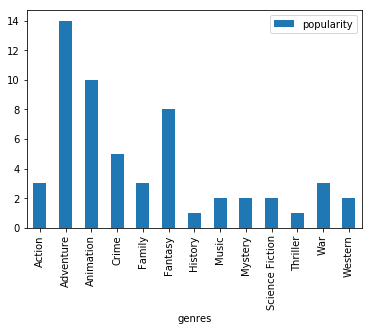

In [38]:
df_pop_genre_by_year.groupby('genres').count().plot(kind='bar');

It looks like the top 3 of the most popular genres year by year are the following genres:
<br><b>1 - Adventure</b>
<br><b>2 - Animation</b>
<br><b>3 - Fantasy</b>

### For the most popular genre in the first year how was the evolution of its popularity?

From our previous analysis we know the first year of information is 1960, and the most popular genre for 1960 was <b>Thriller</b>. <br>
We are going to filter the popularity by year dataframe for viwing the evolution of the "Thriller" movies popularity

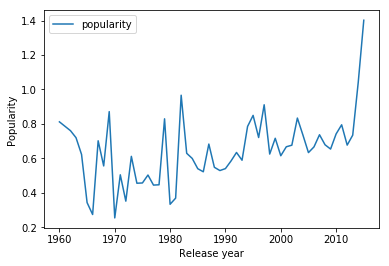

In [39]:
# We are using our datarame that host the mean popularity by genre by year, 
# and filter for those with the genre = Thriller
df_thriller = df_pop_by_year.loc[df_pop_by_year['genres'] == 'Thriller']
df_thriller.plot(x="release_year",y='popularity');
plt.xlabel('Release year')
plt.ylabel('Popularity');

### For the most popular genre in the last year how was the evolution of its popularity?

From our previous analysis we know the last year of information is 2015, and the most popular genre for 2015 was <b>Adventure</b>. <br>
We are going to filter the popularity by year dataframe for viwing the evolution of the "Adventure" movies popularity

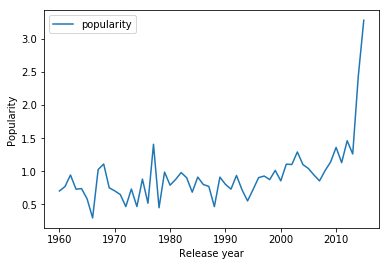

In [40]:
# We are using our datarame that host the mean popularity by genre by year, 
# and filter for those with the genre = Adventure

df_adventure = df_pop_by_year.loc[df_pop_by_year['genres'] == 'Adventure']
df_adventure.plot(x="release_year",y='popularity');
plt.xlabel('Release year')
plt.ylabel('Popularity');

It looks like the popularity for both genres has increased from 1960 and 2010, lets try to put them together to have a better comparision in a single graph

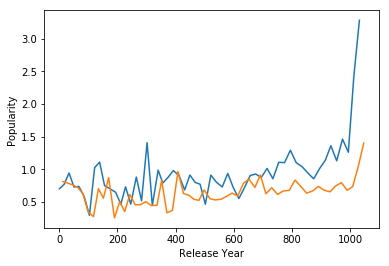

In [41]:
df_pop_by_year[df_pop_by_year['genres'] \
               .isin(['Adventure','Thriller'])] \
.groupby('genres')['popularity'] \
.plot(x="release_year", y='popularity')
plt.xlabel('Release Year')
plt.ylabel('Popularity');


We can clearly see in this graph, that even though the popularity of both genres has been increasing over the years, the increment of popularity for "Adventure" movies has been way higher, starting to make a big difference in between 1990 and 2000

### How is the distribution of movies making revenue vs loosing money?

We are going to compare the movies for which the budget is bigger than the revenue. <br>
Since we have many rows with no revenue or budget values first we are going to clean up our dataframe

In [42]:
df = df[df.revenue != 0]
df = df[df.budget != 0]

In [53]:
len(df[df.revenue == 0])

0

In [54]:
len(df[df.budget == 0])

0

In [43]:
df.shape

(3854, 14)

In [44]:
loosing_money_movies = df[df.budget>df.revenue]
making_monew_movies = df[df.revenue>df.budget]
even_movies = df[df.revenue==df.budget]

print(len(loosing_money_movies))
print(len(making_monew_movies))
print(len(even_movies))

1072
2778
4


It looks like from 3854 movies with revenue and budget information we have 1072 that loose money, 2778 that make any revenue and 4 that are even. Lets see some more details about those 4

In [57]:
even_movies

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
5198,16930,0.126182,Les Clefs de bagnole,Laurent Baffie|Daniel Russo|Pascal Sellem|GÃ©r...,Laurent Baffie,90.0,Comedy,Laurent Baffie Productions,2003-12-10,12,4.8,2003,674722.876405,674722.876405
7250,20200,0.082116,Narco,Guillaume Canet|Zabou Breitman|Guillaume Galli...,Tristan Aurouet|Gilles Lellouche,105.0,Comedy,StudioCanal|M6 Films|Les Productions du TrÃ©so...,2004-12-01,26,5.8,2004,950406.410959,950406.410959
7813,22887,0.065543,Loose Change: Final Cut,NaN,Dylan Avery,129.0,Documentary,Louder Than Words,2007-11-11,12,5.1,2007,6310.011496,6310.011496
10777,28932,0.439210,F.I.S.T.,Sylvester Stallone|Rod Steiger|Peter Boyle|Mel...,Norman Jewison,145.0,Drama|Action,chateau productions,1978-04-26,13,6.7,1978,36.769708,36.769708


We were supecious that the budget or revenue values might be incompleted, in this case we have values for them, and even though its very unlikely a movie would make the same budget and revenue even at a decimal level, we have to trust our data.... or don't we?

<br>
Lets visualize this in a bar graph to have a better idea of the distribution

In [88]:
d = {'making_money': [len(making_monew_movies)], 'loosing_money': [len(loosing_money_movies)], "even":[len(even_movies)]}
d_aux = pd.DataFrame(data=d);


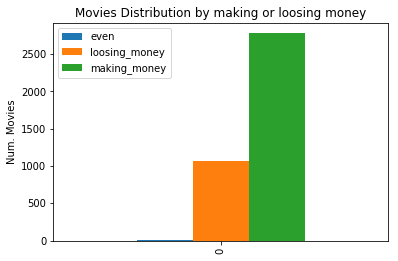

In [89]:
d_aux.plot(kind='bar', title='Movies Distribution by making or loosing money')
plt.ylabel('Num. Movies');

This is a good graph showing the distribution of movies by those which make or loose money. Next we will focus on the properties for the movies with high revenue values

### What kinds of properties are associated with movies that have high revenues?

We are going to analyse the Revenue property against a set of other properties trying to find correlations or patterns in a way that we can predict if a movie will have a high revenue in the future 

we are going to compare:
- revenue vs popularity in tMDB database
- revenue vs budget 
- revenue vs vote average
- revenue by genre 


First we will be removing from our dataframe those movies for which we have no revenue information. We are going to use our dataframe by genre because we want to see if any genre in particular has a correlation with the movie revenue

In [47]:
df_by_genre = df_by_genre[df_by_genre.revenue != 0]
df_by_genre.shape

(12664, 14)

#### Defining high Revenue Movies
For this analysis we are going to define high revenue movies those movies making more revenue than the mean. We can reduce the group to movies making revenue in the 75% percentil if we don't get good results. 
<br>
<br>
Lets get the mean of the revenue field so we can split movies with a higher and lower revenue than the mean.
We will be using the dataframe by gender because we want to check if any gender in particular is related with a higher revenue

In [48]:
df_by_genre.revenue.mean()

129602508.3046063

In [49]:
low_revenue = df_by_genre[df_by_genre.revenue < df_by_genre.revenue.mean()]
high_revenue = df_by_genre[df_by_genre.revenue > df_by_genre.revenue.mean()]

print("Low revenue movies dataframe: ", low_revenue.shape)
print("High revenue movies dataframe: ", high_revenue.shape)

Low revenue movies dataframe:  (9072, 14)
High revenue movies dataframe:  (3592, 14)


Now we have 2 dataframes with the movies splitted by the revenue. <br>
We have 9072 entries for movies with a revenue lower than the mean, and 3529 entries for movies with a revenue higher than the mean.
<br>

Since the dataframe is splitted by gender lets check how many individual movies we have in each dataframe. We are using the dataframe with rows duplicated by genre, so lets get the unique ids for each of them

In [50]:
len(low_revenue.id.unique())

3625

In [51]:
len(high_revenue.id.unique())

1224

It looks like we have 3 times more movies below the revenue mean than above the revenu mean. <br>
Lets see an histogram for each of this groups of movies trying to identify differences in any propertie

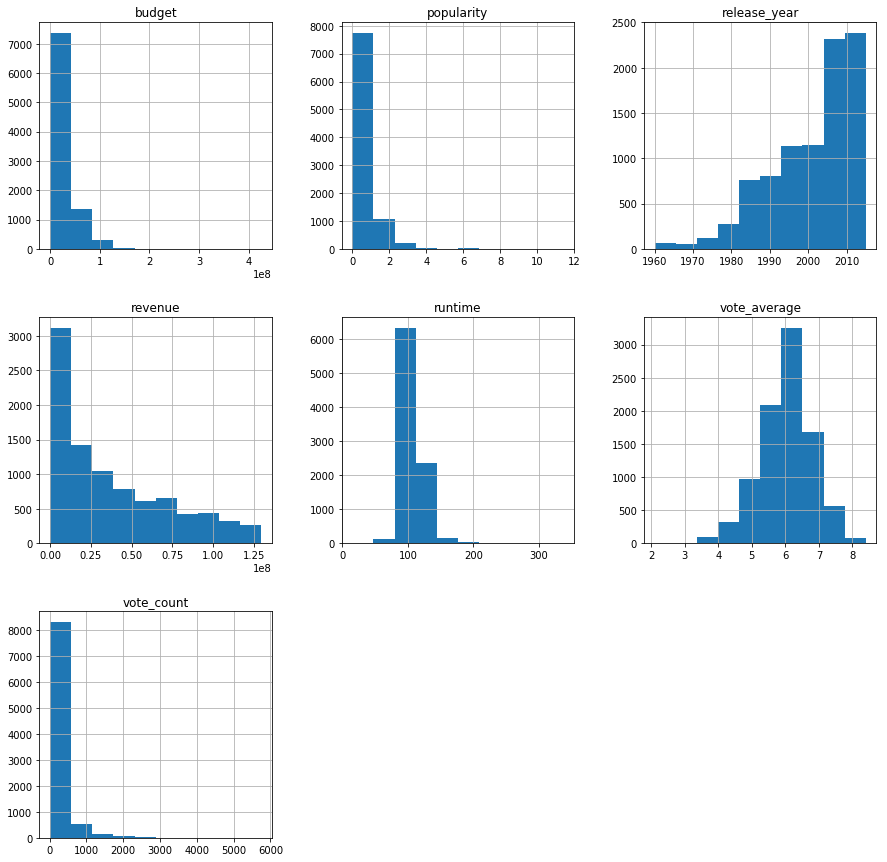

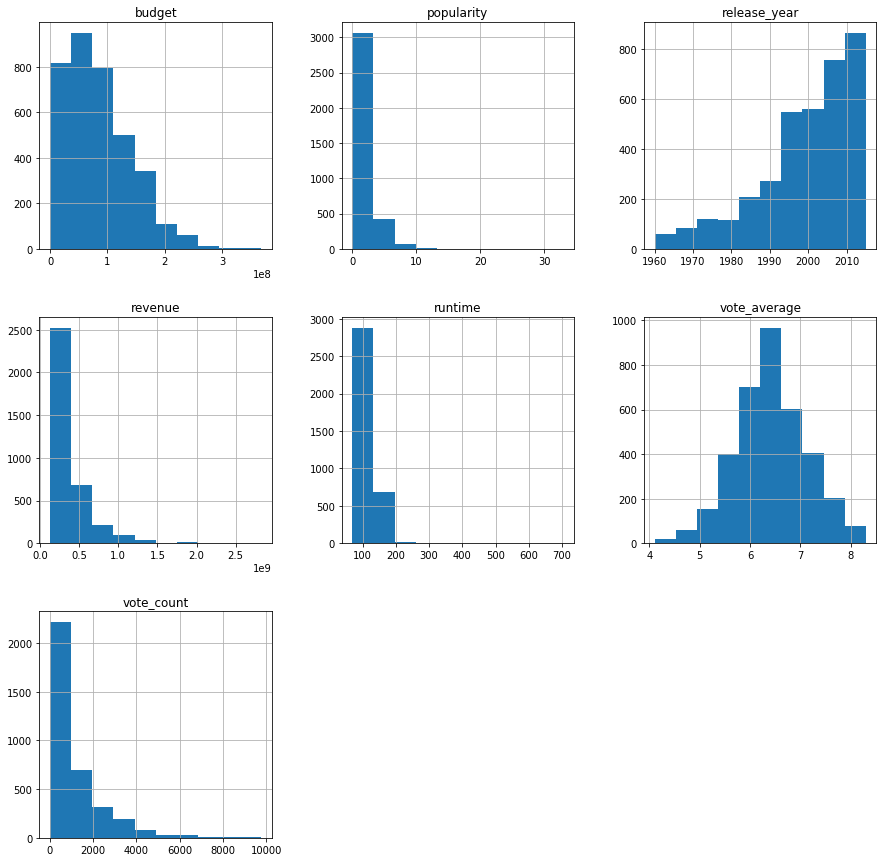

In [52]:
low_revenue.hist(figsize=(15,15));
high_revenue.hist(figsize=(15,15));

Comparing the histograms we can see the following differences:
- <b>Budget:</b> In both dataframes its skewed to the right, but in the dataframe with high revenue movies its more distributed. This gives us un idea that movies with higher budget are getting higher revenu
- <b>Popularity:</b> Looks pretty similar in both dataframes with most of the movies having low popularity values.
- <b>Release Year:</b> Looks pretty similar in both dataframes, skewed to the left. 
- <b>Vote Average:</b> Looks pretty similar in both dataframes, with a normal distribution. 

We don't see many differences comparing the histograms for both groups besides the budget, so we will dig deeper in each property to find some more info


#### Budget 

It looks like the budget might be a property correlated with the revenue. <br>
Lets calculate the mean for budget in both groups of movies

In [53]:
low_revenue.budget.mean()

23356425.533031672

In [54]:
high_revenue.budget.mean()

83092804.42963071

Effectevily the budget mean is almost 4 times higher in high revenue movies, so this is a good indicator for a start, the more you spend the more you win.
<br>
Lets calculate the correlation between revenue and budget to verify this conclusion

In [55]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''

    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    return (std_x*std_y).mean()

In [56]:
correlation(df_by_genre.revenue, df.budget)

0.6553242399123735

It looks like we have a correlation, and it's positive, which confirms that movies with higher budgets usually make more revenue.<br>
Lets take a quick look at the data to see how it looks like

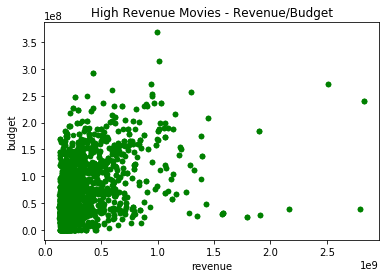

In [57]:
high_revenue.plot(title = 'High Revenue Movies - Revenue/Budget', color = 'green',x = "revenue", y = "budget", kind="scatter");

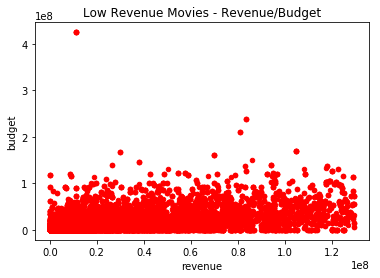

In [209]:
low_revenue.plot(title = 'Low Revenue Movies - Revenue/Budget', color = 'red', x = "revenue", y = "budget", kind="scatter");

Comparing these 2 graphs we can see that most of the movies with low revenue have low budgets, there are exceptions of course, that would be interesting to analyse. 

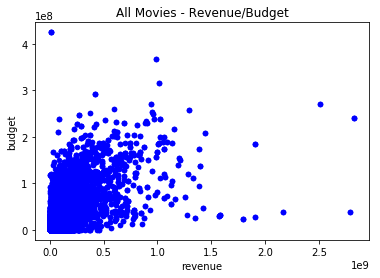

In [205]:
df_by_genre.plot(title = 'All Movies - Revenue/Budget', color='blue', x = "revenue", y = "budget", kind="scatter");

Viewing a graph from all movies by genre with revenue values we can see the positive correlation more clearly

#### Popularity

We are going to repeat the process and analyse the revenue vs the popularity of a movie in tmdb database

In [206]:
low_revenue.popularity.mean()

0.7269562970678995

In [207]:
high_revenue.popularity.mean()

2.1028635192093557

Popularity seems to be higher in high revenue movies, we are going to analyse these variable deeper

In [167]:
correlation(df.revenue, df.popularity)

0.5617457860743325

It looks like we also have a positive correlation between these 2 variables, although not as strong as in the case of the budget, it is still significant. <br>
We can view how the data looks like to get a better idea

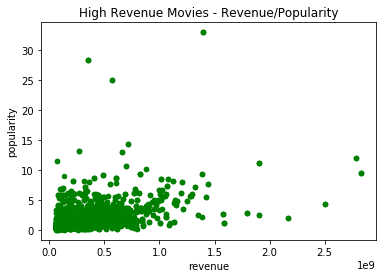

In [124]:
high_revenue.plot(title ='High Revenue Movies - Revenue/Popularity', color='green', x = "revenue", y = "popularity", kind="scatter");

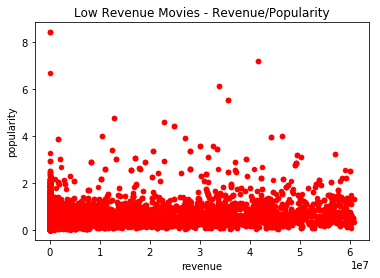

In [122]:
low_revenue.plot(title ='Low Revenue Movies - Revenue/Popularity', color='red', x = "revenue", y = "popularity", kind="scatter");

Comparing these 2 graphs we can see that the popularity in tmdb database for low revenue movies is usually below a value of 2. Being way more distributed and with higher values in the case of high revenue movies

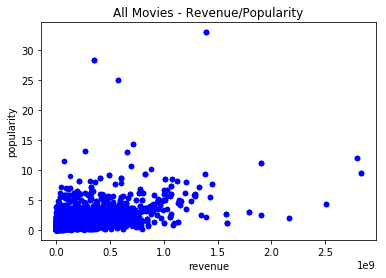

In [210]:
df_by_genre.plot(title ='All Movies - Revenue/Popularity', color='blue', x = "revenue", y = "popularity", kind="scatter");

Viewing the graph of all movies together, it doesn't look like there is a strong correlation, but it might be because the high revenue movies have a very distributed popularity in tmdb. <br>
We can clearly see that low revenue movies usually have a low popularity in tmdb databse, but we can not make any conclusion for high revenue movies

#### Vote Average

We are going to repeat the process and analyse the revenue vs the average vote for a movie in tmdb database

In [211]:
low_revenue.vote_average.mean()

6.027325837742507

In [212]:
high_revenue.vote_average.mean()

6.406681514476611

The mean value seems to be similar for both low and high revenue movies

In [215]:
correlation(df.revenue, df.vote_average)

0.24231917331345365

Correlation seems to be positive but not very significant. <br>
Lets see how the data looks like for each group of movies

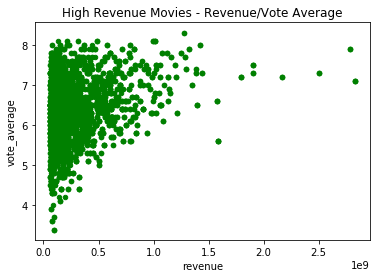

In [126]:
high_revenue.plot(title = 'High Revenue Movies - Revenue/Vote Average', color = 'green', x = "revenue", y = "vote_average", kind="scatter");

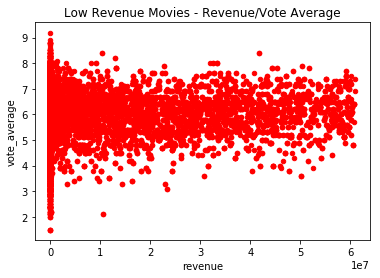

In [127]:
low_revenue.plot(title = 'Low Revenue Movies - Revenue/Vote Average', color = 'red',x = "revenue", y = "vote_average", kind="scatter");

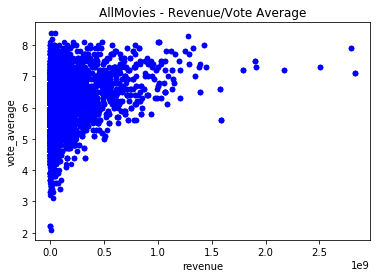

In [217]:
df_by_genre.plot(title = 'AllMovies - Revenue/Vote Average', color = 'blue', x = "revenue", y = "vote_average", kind="scatter");

Distribution of the data is interesting, we can conclude that movies producing very high revenues usually have a high vote average in tmdb database

#### Genre

Now we are going to analse the genres distribution between movies with high vs low revenue. The goal would be to try to identify if any genre in particular has more chances of resulting in a high revenue or low revenue movie

First we are going to get the unique list of genres in each group of movies and see if we can identifty any of them that is not showing up in the other

In [220]:
low_revenue.genres.unique()

array(['Drama', 'Science Fiction', 'Action', 'Comedy', 'Thriller',
       'History', 'Mystery', 'Crime', 'Romance', 'Fantasy', 'Adventure',
       'Horror', 'War', 'Family', 'Animation', 'Music', 'Western',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [218]:
high_revenue.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'Music', 'Horror', 'History',
       'Documentary'], dtype=object)

Some genres seem to be specific to low revenue movies, lets get a clean list of them

In [174]:
list(set(low_revenue.genres.unique()) - set(high_revenue.genres.unique()))

['Foreign', 'TV Movie']

First important peace of information: we don't have any movie with the genre of 'Foreign' or 'TV Movie' making high revenue. 

Now lets see how many times we have each genre showing up in each group

In [221]:
high_revenue.genres.value_counts()

Action             470
Drama              442
Comedy             437
Adventure          404
Thriller           360
Family             224
Science Fiction    213
Fantasy            197
Romance            197
Crime              185
Animation          127
Mystery             99
Horror              79
War                 54
Music               44
History             40
Western             19
Documentary          1
Name: genres, dtype: int64

In [222]:
low_revenue.genres.value_counts()

Drama              1832
Comedy             1334
Thriller           1063
Action              790
Romance             680
Crime               588
Horror              482
Adventure           439
Science Fiction     373
Mystery             311
Family              289
Fantasy             264
Music               142
History             113
Animation           110
Documentary         101
War                  83
Western              46
Foreign              31
TV Movie              1
Name: genres, dtype: int64

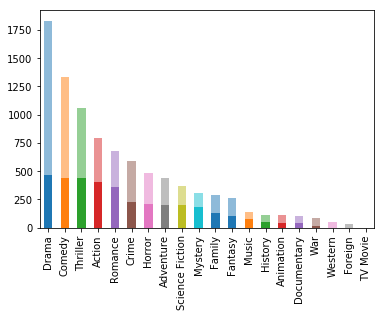

In [181]:
high_revenue.genres.value_counts().plot(kind='bar')
low_revenue.genres.value_counts().plot(kind='bar',alpha=0.5);

The numbers are way higher in the low revenue movies, but that is because we have many more movies under this category. Lets compare the proportions

In [225]:
high_revenue.genres.value_counts()/df_by_genre.genres.value_counts()

Action             0.373016
Adventure          0.479241
Animation          0.535865
Comedy             0.246753
Crime              0.239327
Documentary        0.009804
Drama              0.194371
Family             0.436647
Fantasy            0.427332
Foreign                 NaN
History            0.261438
Horror             0.140820
Music              0.236559
Mystery            0.241463
Romance            0.224629
Science Fiction    0.363481
TV Movie                NaN
Thriller           0.252987
War                0.394161
Western            0.292308
Name: genres, dtype: float64

In [226]:
low_revenue.genres.value_counts()/df_by_genre.genres.value_counts()

Action             0.626984
Adventure          0.520759
Animation          0.464135
Comedy             0.753247
Crime              0.760673
Documentary        0.990196
Drama              0.805629
Family             0.563353
Fantasy            0.572668
Foreign            1.000000
History            0.738562
Horror             0.859180
Music              0.763441
Mystery            0.758537
Romance            0.775371
Science Fiction    0.636519
TV Movie           1.000000
Thriller           0.747013
War                0.605839
Western            0.707692
Name: genres, dtype: float64

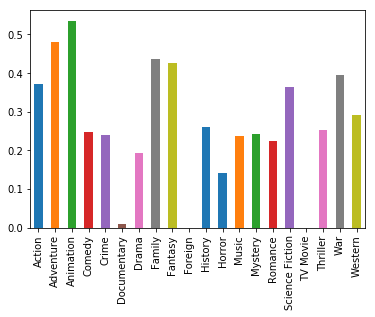

In [59]:
(high_revenue.genres.value_counts()/df_by_genre.genres.value_counts()).plot(kind='bar');


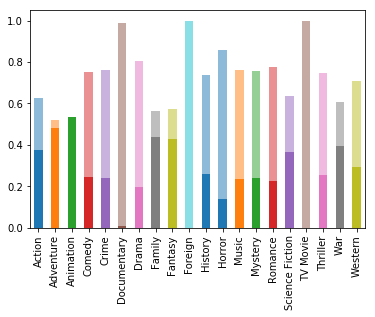

In [60]:
(high_revenue.genres.value_counts()/df_by_genre.genres.value_counts()).plot(kind='bar')
(low_revenue.genres.value_counts()/df_by_genre.genres.value_counts()).plot(kind='bar', alpha=0.5);

In these 2 graphs we can easily visualize the proportion of movies in each group by genre. <br>
It looks like for some genres is very hard to make a movie that results in producing high revenues. <br>
<br>
Lets get a final list of the genres we would not recommend if we want to generate a high revenue. We are going to list only the genres for which 75% of the movies of this genre resulted in low revenue. 


In [83]:
# List of unique genres for low revenue movies as a numpy array
lr_unique_genres = np.array(sorted(low_revenue.genres.unique()))
lr_unique_genres

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='<U15')

In [84]:
# Proportion for each genre
lr_unique_genres_prop = (low_revenue.genres.value_counts()/df_by_genre.genres.value_counts()).dropna()
lr_unique_genres_prop

Action             0.626984
Adventure          0.520759
Animation          0.464135
Comedy             0.753247
Crime              0.760673
Documentary        0.990196
Drama              0.805629
Family             0.563353
Fantasy            0.572668
Foreign            1.000000
History            0.738562
Horror             0.859180
Music              0.763441
Mystery            0.758537
Romance            0.775371
Science Fiction    0.636519
TV Movie           1.000000
Thriller           0.747013
War                0.605839
Western            0.707692
Name: genres, dtype: float64

In [86]:
lr_unique_genres_prop.describe()

count    20.000000
mean      0.732490
std       0.152846
min       0.464135
25%       0.621698
50%       0.750130
75%       0.782935
max       1.000000
Name: genres, dtype: float64

In [87]:
lr_unique_genres[(lr_unique_genres_prop>0.782935).values]

array(['Documentary', 'Drama', 'Foreign', 'Horror', 'TV Movie'],
      dtype='<U15')

These are the genres that are most likely to result in low revenue movies:

- Documentary
- Drama
- Foreign
- Horror
- TV Movie


Now lets do the same for the genres that are most likely to produce high revenus

In [79]:
hr_unique_genres = np.array(sorted(high_revenue.genres.unique()))
hr_unique_genres

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War',
       'Western'],
      dtype='<U15')

In [78]:
hr_unique_genres_prop = (high_revenue.genres.value_counts()/df_by_genre.genres.value_counts()).dropna()
hr_unique_genres_prop

Action             0.373016
Adventure          0.479241
Animation          0.535865
Comedy             0.246753
Crime              0.239327
Documentary        0.009804
Drama              0.194371
Family             0.436647
Fantasy            0.427332
History            0.261438
Horror             0.140820
Music              0.236559
Mystery            0.241463
Romance            0.224629
Science Fiction    0.363481
Thriller           0.252987
War                0.394161
Western            0.292308
Name: genres, dtype: float64

In [80]:
hr_unique_genres_prop.describe()

count    18.000000
mean      0.297233
std       0.129444
min       0.009804
25%       0.237251
50%       0.257212
75%       0.388874
max       0.535865
Name: genres, dtype: float64

In [82]:
hr_unique_genres[(hr_unique_genres_prop>0.388874).values]

array(['Adventure', 'Animation', 'Family', 'Fantasy', 'War'],
      dtype='<U15')

These are the genres that are most likely to result in high revenue movies:

- Adventure
- Animation
- Family
- Fantasy
- War

<a id='conclusions'></a>
## Conclusions

We have analysed the dataset for answering very valuable questions related to the movie industry. From the results of this analysis we came up with the following conclusions:

#### Most popular genre by year:

We have listed for each year from 1960 to 2015 which genres were the most popular. <br><br>
We have analysed how the popularity evolved for the most popular genre in 1960 and for the most popular genre in 2015<br><br>
We have identified that "Adventure" is in overall the genre which has been the most popular most times during this time frame. With a top 3 of:
 - Adventure
 - Animation
 - Fantasy
 
<br>
#### Proportion of movies making money vs loosing

We have analysed from the dataset the proportion of movies with a higher revenue that its budget. 
 - 27.9% of movies have higher budgets than revenue
 - 72% of movies have higher revenue than budget
 - 0.1 % of movies with equal budget than revenue
 
<br>
#### Properties of movies with high revenue

We have analysed the difference between movies making a higher revenue than the mean vs those with a lower revenue than the mean. <br>

- We have identified that usually movies with higher budgets have higher revenues. 
- We have identified that usually movies with a low popularity make low revenue. 
- We have identified that usually movies with a high revenue have a high vote_average value in tmdb database
- We have identified if any genre in particular is most likley to produce high revenue, concluding that genres associated with high revenue movies are: Adventure, Animation, Family, Fantasy and War. And genres associated with low revenue movies are: Docuemtary, Drama, Foreign, Horror and Tv Movie
 
 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])